# 1) IMPORTING THE REQUIRED LIBRARIES:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2) SETTING UP THE NOTEBOOK TO GOOGLE DRIVE TO ACCESS THE DATASET:

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3) LOADING THE DATA:  

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cognizant Internship/sample_sales_data.csv")

# 4) VIEWING THE DATA:

In [ ]:
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


# 5) DESCRIPTIVE ANALYSIS:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


NOTE:
- We can observe that there are no null values in the data.
- features like unnamed:0, unit_price, quantity, total are numerical including int and float dtype and rest of the features are object type.








In [ ]:
data.nunique()

Unnamed: 0        7829
transaction_id    7829
timestamp         7738
product_id         300
category            22
customer_type        5
unit_price          64
quantity             4
total              256
payment_type         4
dtype: int64

In [ ]:
# Note: The column Unnamed: 0 is not relevant to our analysis hence we will drop this column.
data.drop(["Unnamed: 0"], axis = 1, inplace = True)

#Note: Also we can observe that the transaction_id has all unique values hence it will not contribute much to our analysis hence we will drop transaction_id
data.drop(['transaction_id'], axis=1, inplace = True)

In [ ]:
data.head()

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


Note:
- We can see that a customer's mean quantity purchase is about 2.5 approximately 3 with a mean expenditure of 19.70.
- The minimum and maximum quantity purchased by the customer is 1 and 4 with minimum and maximum expenditure of 0.19 and 95.96 respectively.

# 6) EXPLORATORY DATA ANALYSIS:

In [ ]:
data["customer_type"].unique()

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

In [ ]:
customer_type_expenditure = data.groupby('customer_type')['total'].sum()
customer_type_expenditure

customer_type
basic         29569.16
gold          29939.99
non-member    31755.24
premium       31655.68
standard      31388.78
Name: total, dtype: float64

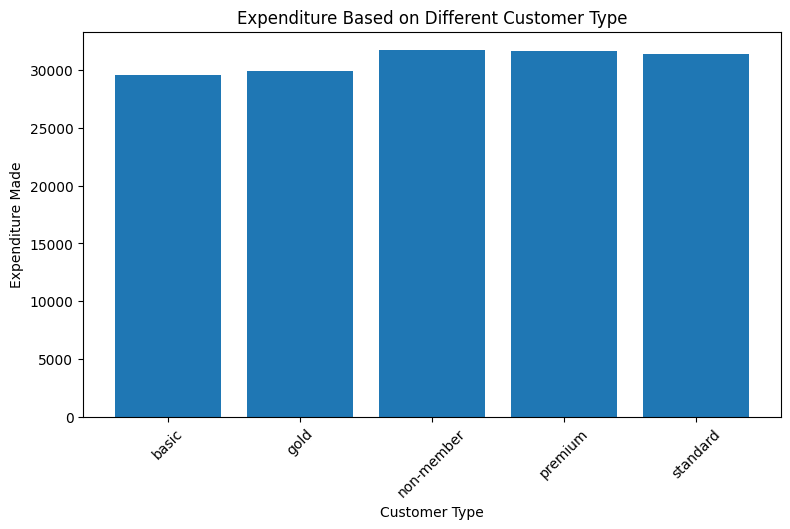

In [ ]:
plt.figure(figsize=(9, 5))
plt.bar(customer_type_expenditure.index,customer_type_expenditure.values)
plt.xlabel('Customer Type')
plt.ylabel('Expenditure Made')
plt.title('Expenditure Based on Different Customer Type')
plt.xticks(rotation=45)
plt.show()


Note:
- Non-member customer type has highest number of purchases.
- Basic customer type has comparatively less expenditure.

In [ ]:
data["payment_type"].unique()

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

In [ ]:
payment_type_expenditure = data.groupby('payment_type')['total'].sum()
payment_type_expenditure

payment_type
cash           41287.31
credit card    39309.52
debit card     37010.67
e-wallet       36701.35
Name: total, dtype: float64

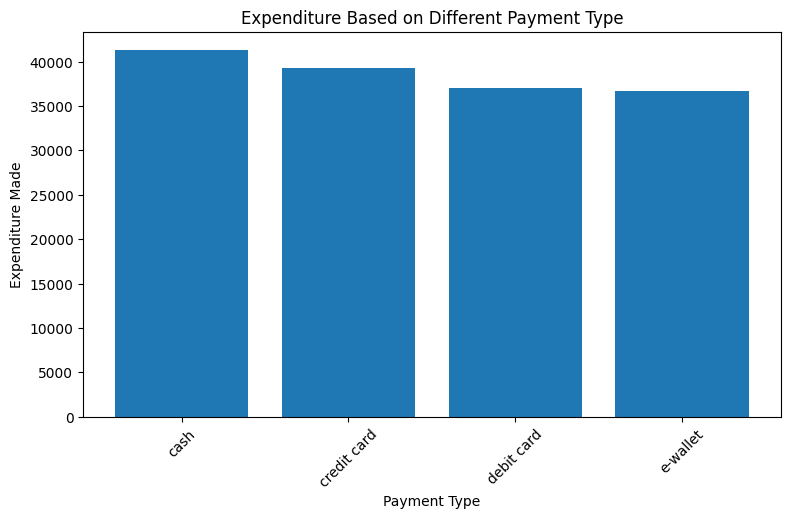

In [ ]:
plt.figure(figsize=(9, 5))
plt.bar(payment_type_expenditure.index,payment_type_expenditure.values)
plt.xlabel('Payment Type')
plt.ylabel('Expenditure Made')
plt.title('Expenditure Based on Different Payment Type')
plt.xticks(rotation=45)
plt.show()

Note:
- Maximum number of expenditure are done through cash.
- with e-wallet mode of payment being the lowest mode of expenditure.

In [ ]:
category = data["category"].unique()
category_count= data["category"].value_counts()

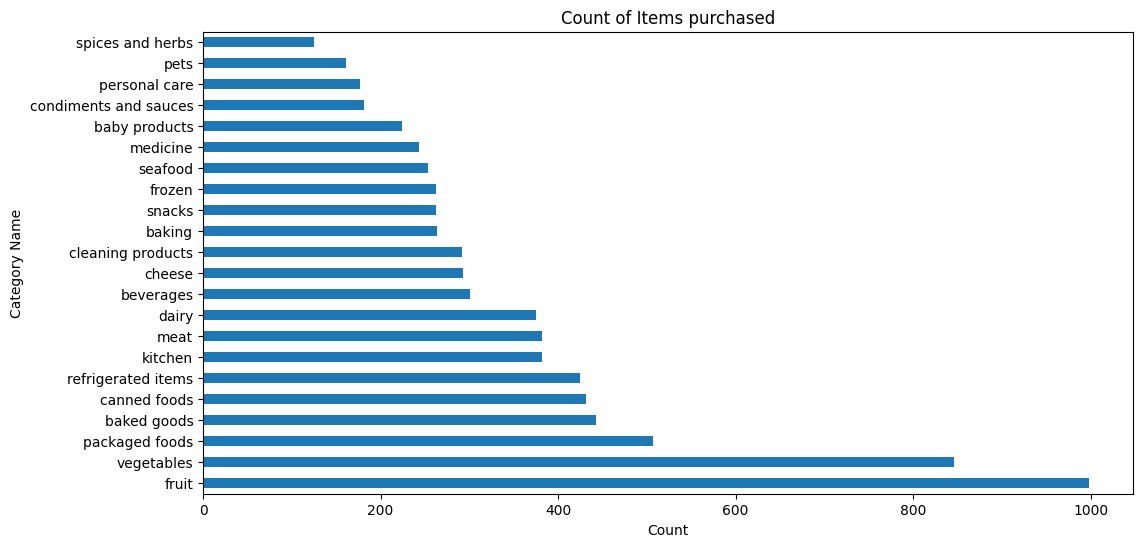

In [ ]:
plt.figure(figsize=(12, 6))
category_count.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.title('Count of Items purchased')
plt.show()

Note:
- We can observe that the top 3 items that are purchased be the customers are fruits, vegetables, and packaged foods related products
- We can also observe that the bottom 3 items that are purchased by the customers are spices and herbs, pets, and personal care related products.

In [ ]:
data["timestamp"].nunique()

7738

We can observe that there are 7738 missing values.
lets analyze the data timestam on hourly basis so that we can see which are the busy hours where customer makes maximum purchases.


In [ ]:
data["timestamp"] = pd.to_datetime(data["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data["hour"] = data['timestamp'].dt.hour

In [ ]:
data['hour'].value_counts().sort_values()

15    669
13    693
17    699
14    702
19    709
9     718
12    721
10    723
18    727
16    730
11    738
Name: hour, dtype: int64

- We can observe that 11th, 16th and 18th hour of the day has maximum number of purchases done by the customers and 15th, 13th and 17th hour has comparatively minimum number of purchases by the customers.
- We can observe that the 11th hour is around the late morning which can be the break time for the customers which used by the customers to go for grocery shopping for their lunch and same way 18th and 16th hour being the evening hours were the people are leaving for their home and on the way they go grocery shopping.
- However we have only 7829 records as this is just an assumption since this is just a sample dataset and while using the same analytics to actual data the inferences can vary.

<ipython-input-307-c640a6751895>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


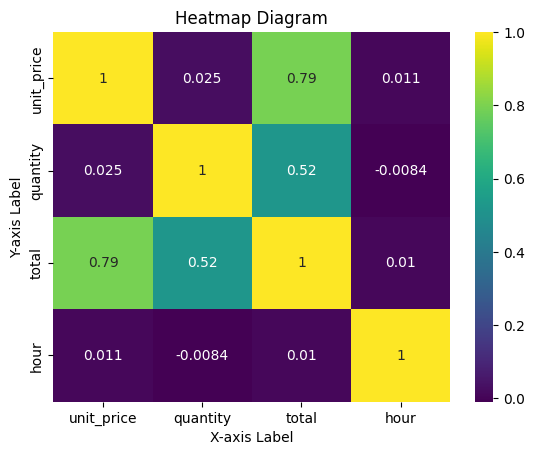

In [ ]:
correlations = data.corr()

sns.heatmap(correlations, cmap='viridis', annot = True)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Heatmap Diagram')

plt.show()

We can Observe that the unit_price and total has high correlation.which is true
as the total is dependent on the unit price.

# 7) Summary:
How to better stock the items in the store?


Inferences:
Lets first talk about the inferences
- Firstly we have found out that no matter what tier/customer_type the customer belong to they have no significant pattern of purchases made by them. they are some where similar to each other.
- Secondly there is no inferences from the payment_type used by the customers hence we cannot directly or indirectly target the customers for any offers on their payment to increase the purchases and sell the stock in the store which are near to get unsuable in near future.

Suggestions to client:
- We can observe that it is quite impossible to get good inferences as the amount of data provided is not sufficient to get to a conclusion on providing a better solution on how to stock the items in the store.
- We might be needing more amount of data or records at least on a yearly basis to find some trends related to the customer’s purchases keeping the seasons in mind which can affect the demand for any product for that particular month/season.
- Finally, we are left with the conclusion as we do not have much data in hand we are unable to get to a conclusion hence requesting to gather/provide more data so that we can make a good inference out of the data and suggest good predictive as well as prescriptive measures to meet the client needs and requirements.






Note:
* After requesting for more data we are provided with two additonal datasets i.e., sensor stock level data which tells us the stock level percentages and sensor storage data which tells us the temprature of that stock storage facility.
* Now our first step is to import all these 3 dataset, make some data manipulation so that we are able to merge the data.
* Merge all these 3 dataset so that we can make analysis and interpretation on our final data.

# 1) Loading The Data:

In [ ]:
sales_data = pd.read_csv(r"/content/drive/MyDrive/Cognizant Internship/sales.csv")

In [ ]:
stock_level_data = pd.read_csv(r"/content/drive/MyDrive/Cognizant Internship/sensor_stock_levels.csv")

In [ ]:
storage_temp_data = pd.read_csv(r"/content/drive/MyDrive/Cognizant Internship/sensor_storage_temperature.csv")

In [ ]:
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_level_data.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
storage_temp_data.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Note: We can note that in sales data, stock level data and storage temperature data the column Unnamed :0 is not useful for our analysis hence we will drop this column in all the 3 datasets

# 2) Data Cleaning:

In [ ]:
sales_data.drop(["Unnamed: 0"], axis = 1, inplace =True)
stock_level_data.drop(["Unnamed: 0"], axis =1, inplace =True)
storage_temp_data.drop(["Unnamed: 0"], axis=1, inplace =True)

We can note that in above 3 datasets the timestamp column is not in proper order also we need to convert all these hourly format.

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [ ]:
sales_data = convert_to_datetime(sales_data, 'timestamp')
stock_level_data = convert_to_datetime(stock_level_data,'timestamp')
storage_temp_data = convert_to_datetime(storage_temp_data,'timestamp')

Note: The clients wants the model to pridict the stock levels on hourly basis hence we need to convert the time into hourly basis.

In [ ]:
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [ ]:
sales_data = convert_timestamp_to_hourly(sales_data, 'timestamp')
stock_level_data = convert_timestamp_to_hourly(stock_level_data,'timestamp')
storage_temp_data = convert_timestamp_to_hourly(storage_temp_data,'timestamp')

In [ ]:
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_level_data.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
storage_temp_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Note: We can observe that all of our timestamp is converted in hourly basis.
Our next step is to agregate the data in terms of quantity.
* In sales data, which will give the average mean of all the quantity on hourly basis of all the product.
* Similarly we will be finding the average stock pct levels on hourly basis in our stock level data so that we get a brief understanding on average stock percentage of a particular product.
* we will also find the mean storage temperature of the stock storage facility.

In [ ]:
sales_agg = sales_data.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


Note: We can observe the average quantity with respect to a particular product.

In [ ]:
stock_agg = stock_level_data.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


Note: We can see the average estimated stock percentage of a particular product.

In [ ]:
temp_agg = storage_temp_data.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


Note: We can see the mean temperature of a particular storage facility on hourly basis.

# 3) Merging The Data:

Now since the data is trasformed except for one last step is to merge all this 3 dataset so that we can go forward with this data to get some further inferences.

In [ ]:
merged_data = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merged_data = merged_data.merge(temp_agg, on='timestamp', how='left')
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Note: We can observe that there are 3067 null values in the quantity data. from this we can also interpret that there can be no quantities bought in that particular hour also we nee to clearify this with the team and client so that we are not making any wrong assumptions. also we need to fill all this null values with 0.

In [ ]:
merged_data["quantity"] = merged_data["quantity"].fillna(0)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Note: We can see that all the null values in the quantity column has been treated and replaced by 0.

In [ ]:
merged_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885


In our dataset it will be useful for us to add category of the product as well as unit price so that we can merge these two columns with respect to the product_id,  which will help in our analysis.

In [ ]:
unitprice_category = sales_data[["product_id","category","unit_price"]]
unitprice_category .head()

,product_id,category,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,4.49


In [ ]:
unitprice_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  7829 non-null   object 
 1   category    7829 non-null   object 
 2   unit_price  7829 non-null   float64
dtypes: float64(1), object(2)
memory usage: 183.6+ KB


Note: We will drop all the duplicates in the data.

In [ ]:
unitprice_category.drop_duplicates()

,product_id,category,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,4.49
...,...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,14.99
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products,13.49
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,14.19
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,16.99


Now we can merge this data with our main data on product_id

In [ ]:
final_data = merged_data.merge(unitprice_category, on = "product_id", how = 'left')
final_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304741 entries, 0 to 304740
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            304741 non-null  datetime64[ns]
 1   product_id           304741 non-null  object        
 2   estimated_stock_pct  304741 non-null  float64       
 3   quantity             304741 non-null  float64       
 4   temperature          304741 non-null  float64       
 5   category             304741 non-null  object        
 6   unit_price           304741 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.6+ MB


Note: As we can see that we have merged the data and our final data has no null values.

# 4) Feature Engineering and Selection:

Note: We are now ready with our final cleaned data and we can see that the data has some categorical variables and as far we know that machine learning model understands the numeric data however there are some models too which understands categorical data aswell but as of now we will be focusing numeric machine learning model.

also our analysis is mostly on time hourly basis we can divide the timestamp to different columns as per our requirement and we can eliminate the original timestamp column.

This process can also be achieved using encoding techniques.

In [ ]:
final_data['timestamp_day_of_month'] = final_data['timestamp'].dt.day
final_data['timestamp_day_of_week'] = final_data['timestamp'].dt.dayofweek
final_data['timestamp_hour'] = final_data['timestamp'].dt.hour
final_data.drop(columns=['timestamp'], inplace=True)
final_data.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9


Note : We can see that the category column is in categorical format hence we should convert this into numerical format. since the category column has 22 unique categories what we can do is we can use OHE (One Hot Encoding) with the help of get_dummies from pandas package.
To know more about OHE please refer the link:
https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [ ]:
final_data = pd.get_dummies(final_data, columns=['category'])

In [ ]:
final_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0


Note: Now the only categorical column left is product_id we can see that the product_id has all the unique values and hence it will not add any value in our analysis hence we will eleminate this column.

In [ ]:
final_data.drop(['product_id'],axis = 1, inplace = True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304741 entries, 0 to 304740
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   estimated_stock_pct             304741 non-null  float64
 1   quantity                        304741 non-null  float64
 2   temperature                     304741 non-null  float64
 3   unit_price                      304741 non-null  float64
 4   timestamp_day_of_month          304741 non-null  int64  
 5   timestamp_day_of_week           304741 non-null  int64  
 6   timestamp_hour                  304741 non-null  int64  
 7   category_baby products          304741 non-null  uint8  
 8   category_baked goods            304741 non-null  uint8  
 9   category_baking                 304741 non-null  uint8  
 10  category_beverages              304741 non-null  uint8  
 11  category_canned foods           304741 non-null  uint8  
 12  category_cheese 

# 5) Building Machine Learning Model:

* Its now time to build a machine learning model which can predict the stock level as our main focus is to know the stock level on hourly basis.
* Hense to achieve this we will be using supervised machine learning models since our target variable will be stock_level_pct which is continuous numerical in nature.
* We will also use  cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.
* To ensure that our machine learning model is trained with best accuracy we will also use K-folds.
* Lets forst divide our data into independent variabels x and dependent  or target variable y.

In [ ]:
final_data.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = final_data.drop(columns=['estimated_stock_pct'])
y = final_data['estimated_stock_pct']

In [ ]:
print(X.shape)
print(y.shape)

(304741, 28)
(304741,)


Note:
* We can observe that our data is successfully divided into train inpependent and dependent variables.

* This shows that we have 29 predictor variables that we will train our machine learning model on and 10845 rows of data.

* Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.

* Typically, we should leave at least 20-30% of the data for testing.

In [ ]:
K_folds = 10
split = 0.75

* For this exercise, we are going to use a RandomForestRegressor model, which is an instance of a Random Forest. These are powerful tree based ensemble algorithms and are particularly good because their results are very interpretable.

* We are using a regression algorithm here because we are predicting a continuous numeric variable, that is, estimated_stock_pct. A classification algorithm would be suitable for scenarios where you're predicted a binary outcome, e.g. True/False.

* We are going to use a package called scikit-learn for the machine learning algorithm, so first we must install and import this if the package is not installed in the system, along with some other functions and classes that can help with the evaluation of the model.

In [ ]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.015
Fold 2: MAE = 0.015
Fold 3: MAE = 0.015
Fold 4: MAE = 0.015
Fold 5: MAE = 0.015
Fold 6: MAE = 0.015
Fold 7: MAE = 0.015
Fold 8: MAE = 0.015
Fold 9: MAE = 0.015
Fold 10: MAE = 0.015
Average MAE: 0.02


Note:
* The mean Absolute Eroor (MAE) is  same for all the folds which is a good sign as our model is performimg accurate and consistent on different folds i.e., 10 different random samples of data.

* MAE is used as it shows how accurately our model is able to predict i.e., our target variable estimated_stock_pct

* The average MAE is also minimum as we needed. The MAE is basically the tells us the performance of our model hence MAE should be as minimal as possible.

* we can use the trained model to intepret which features were signficant when the model was predicting the target variable. We will use matplotlib and numpy to visualuse the results, so we should install and import this package.

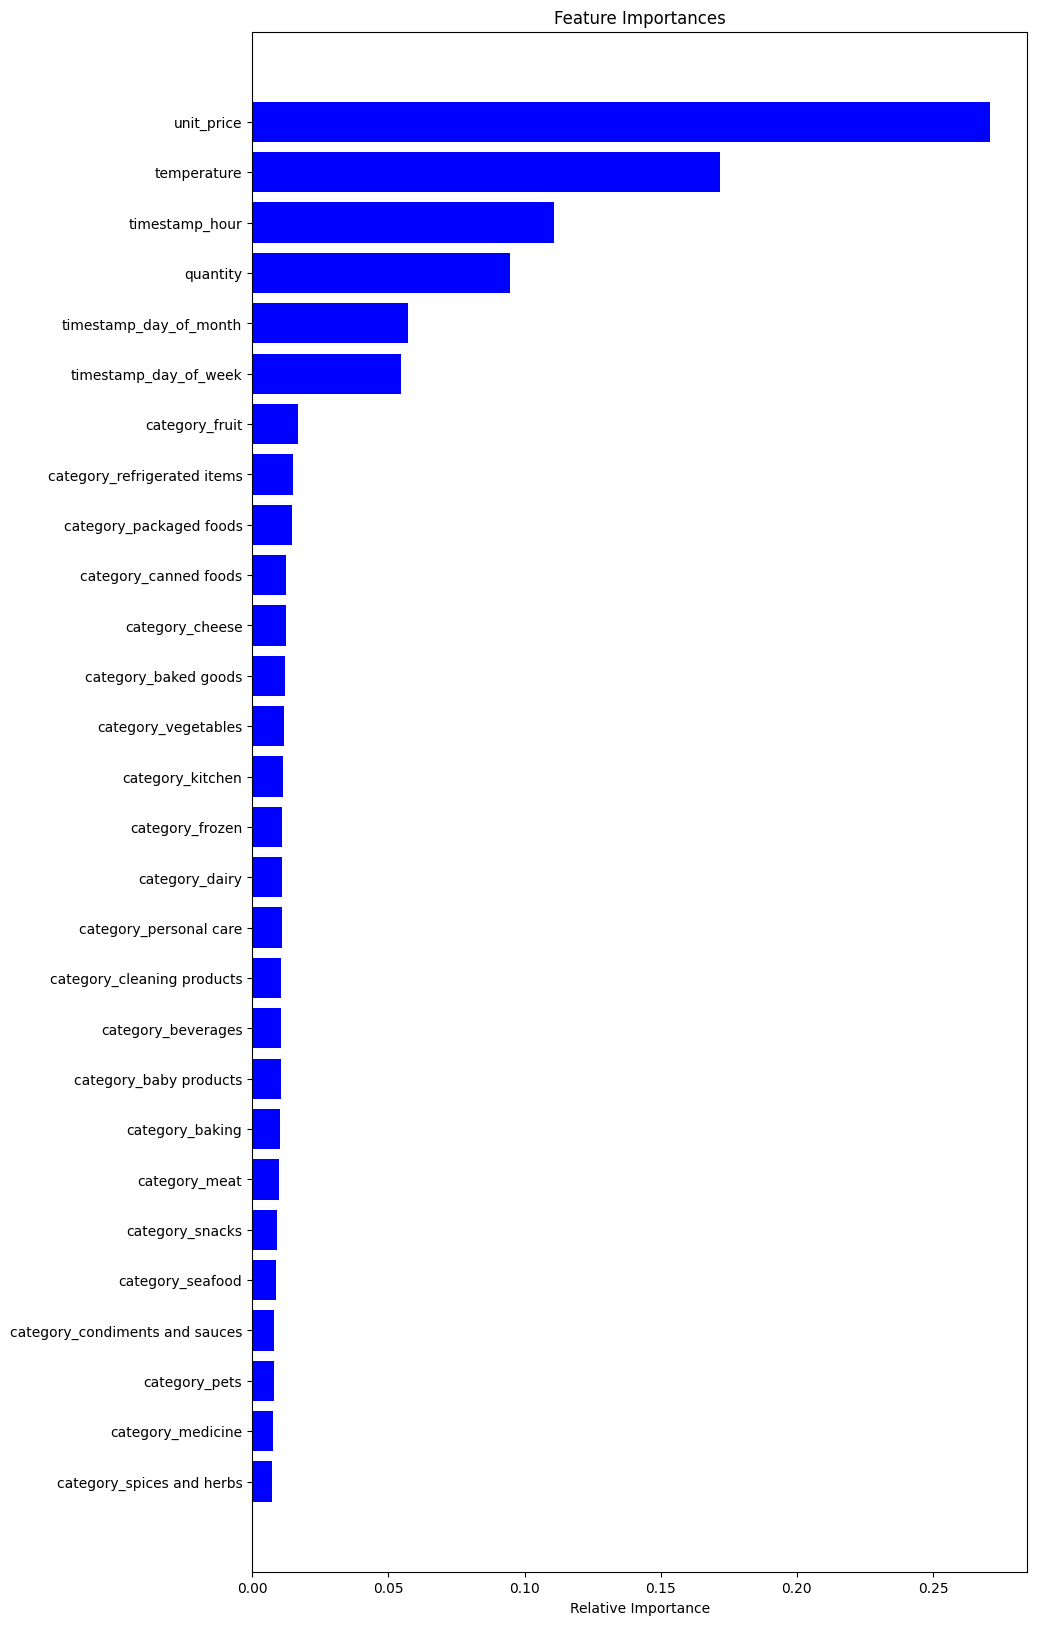

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Note:
* From the above feature importances graph we can conclude that unit_price, temperature, qunatity timestamp_hour are important in predicting the stock.
* We can report the insights of this business to the team and client.
